# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [4]:
# make_regression로 데이터 생성
X, Y = make_regression(n_samples= 1000, n_features=10, noise =15, random_state =42, bias=10)

X = pd.DataFrame(X, columns = ['X1','X2','X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9','X10'])
Y = pd.DataFrame(Y, columns = ['Y'])

df = pd.concat([X, Y], axis=1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-47.145468
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,99.121816
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-94.015494
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,65.708771
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,161.783618
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.197338,-0.054894,-0.194908,-0.151273,0.521122,0.285554,1.133770,0.645216,0.089581,0.555604,116.603027
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.422397
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-20.363397
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-9.310398


# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


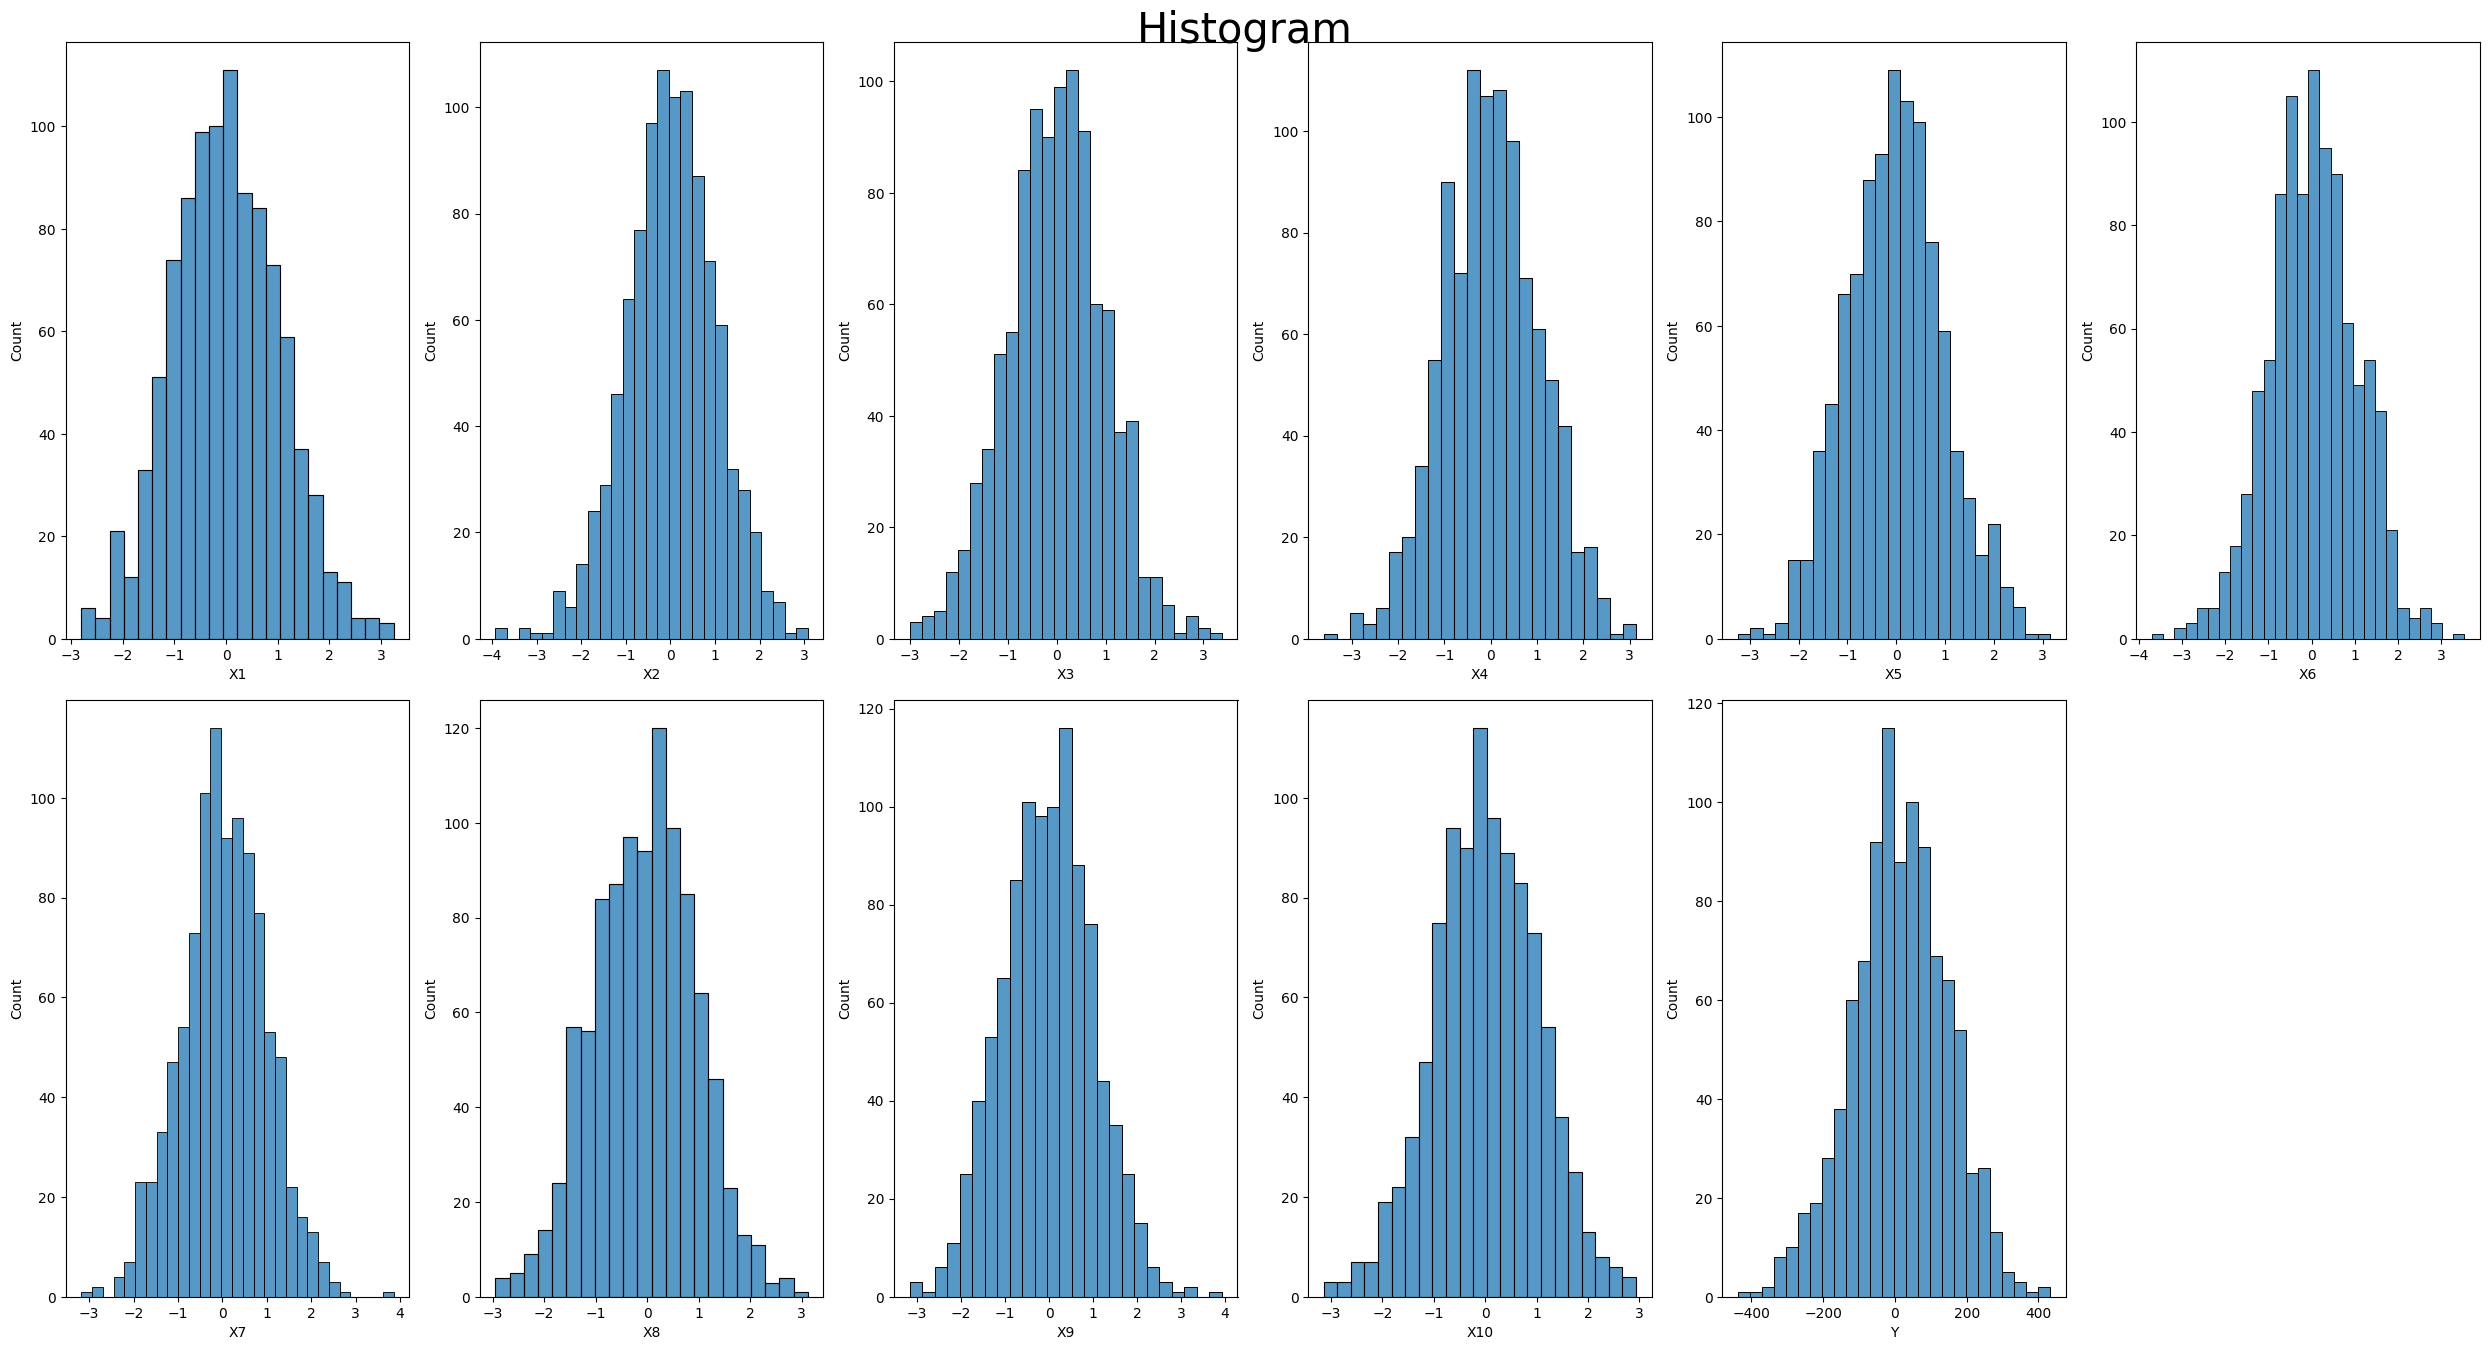

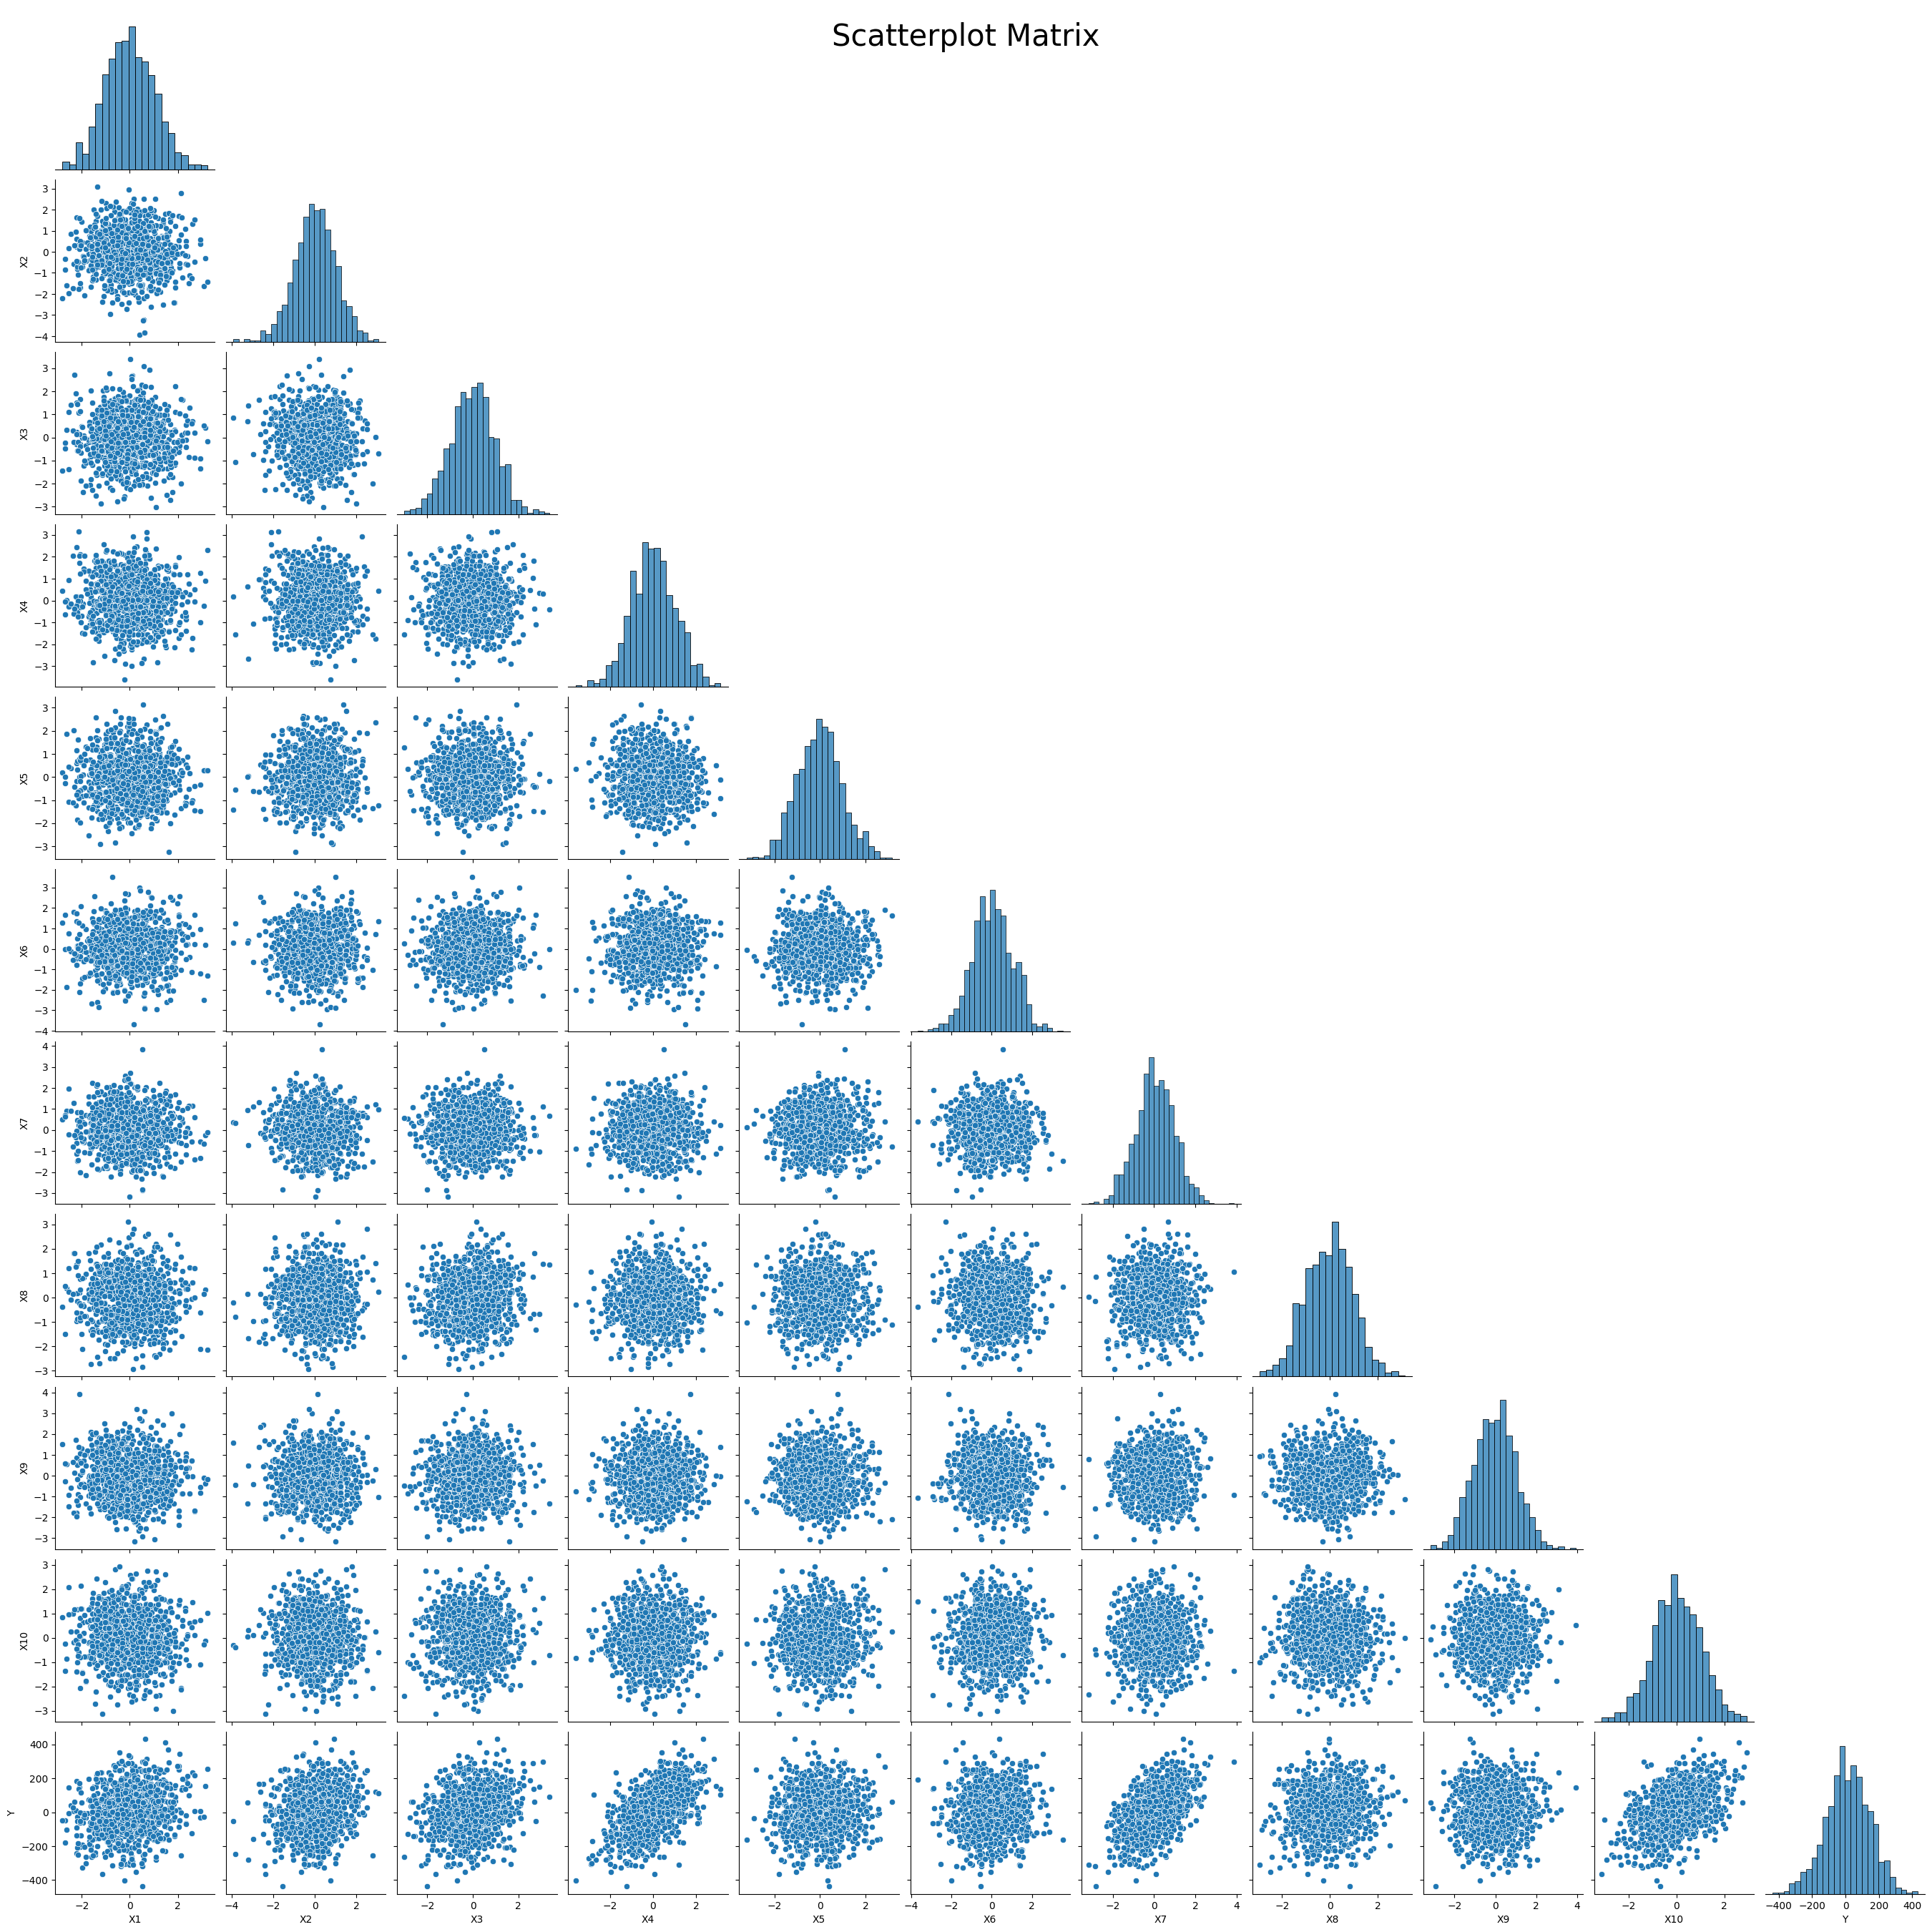

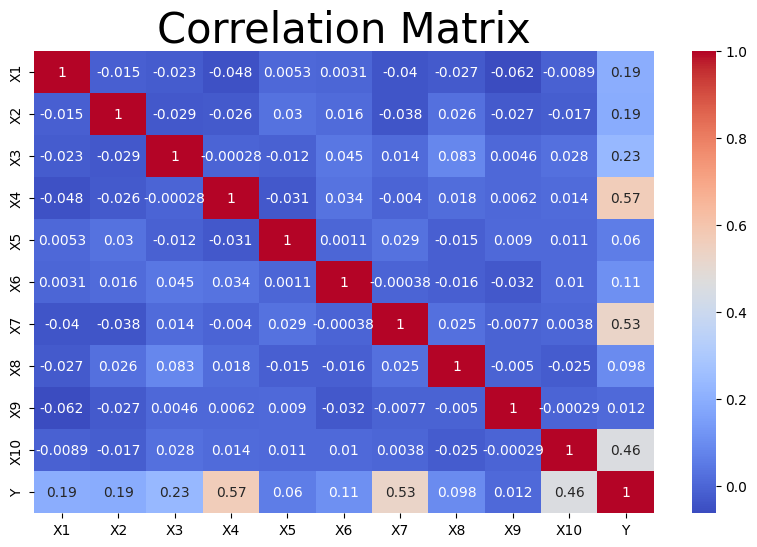

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002689,0.010788,-0.023104,0.005495,-0.022542,0.031292,0.038105,-0.043075,-0.029252,0.013622,12.721240
std,1.031230,1.005433,0.986846,1.030962,0.983366,1.016046,0.945284,0.983406,1.037024,1.012645,132.370053
min,-2.801912,-3.922400,-3.007632,-3.601085,-3.241267,-3.688365,-3.176704,-2.943142,-3.170426,-3.138515,-437.629419
25%,-0.744779,-0.616527,-0.650034,-0.713176,-0.702626,-0.631506,-0.559290,-0.750008,-0.749592,-0.651541,-70.474981
50%,-0.024976,0.014006,-0.003221,-0.013284,-0.015036,0.007605,0.019097,-0.001346,-0.012086,-0.012020,10.123947
75%,0.683319,0.679698,0.608861,0.696602,0.613766,0.685621,0.687027,0.638310,0.680087,0.721896,100.789341
max,3.243093,3.076860,3.377383,3.137749,3.152057,3.529055,3.852731,3.117681,3.926238,2.935658,432.930638


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(25,20))
for idx, col in enumerate(df.columns):
  plt.subplot(3, 6, idx+1)
  sns.histplot(df[col])
  plt.xlabel(col, fontsize=10)
plt.suptitle("Histogram", fontsize = 30)
plt.tight_layout()
plt.show()

# Scatterplot matrix
sns.pairplot(df, corner = True)
plt.suptitle("Scatterplot Matrix", fontsize = 30)
plt.show()

# Correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm')
plt.title("Correlation Matrix", fontsize = 30)
plt.show()

# 요약 통계량
df.describe()

# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [9]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1]) #맨 뒤 Y만 빼고
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.531525,0.876753,-0.713406,-0.051720,-0.645549,-1.127075,-0.969212,1.055670,-0.260919,-0.766083,-47.145468
1,0.522111,1.249713,-1.781078,1.167955,-0.092196,-0.987018,1.086001,-0.521101,0.743433,-0.989138,99.121816
2,-0.663220,0.145622,0.171278,-1.395674,-0.655534,0.142681,0.579158,0.245181,-0.361899,-0.613645,-94.015494
3,0.900318,0.383237,0.709138,0.158335,1.624510,-0.146193,-0.080219,-0.308096,0.892468,-0.840796,65.708771
4,-0.539658,1.057630,1.610608,0.360733,0.158221,-1.041623,-0.109921,-0.668467,-1.441319,1.167256,161.783618
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.188849,-0.065359,-0.174182,-0.152137,0.553137,0.250371,1.159666,0.700255,0.114647,0.535483,116.603027
996,-0.955819,1.578827,0.110120,0.696342,-0.643244,0.604012,-1.856258,-0.475660,0.337849,0.065499,-52.422397
997,0.417818,-0.840244,1.685360,1.666830,-0.786905,-0.700300,-2.075416,0.239049,-0.507507,-0.172092,-20.363397
998,-0.262964,-1.384561,0.175091,-0.019182,-0.239175,-0.460296,0.063211,-0.027020,-0.631335,0.667441,-9.310398


# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

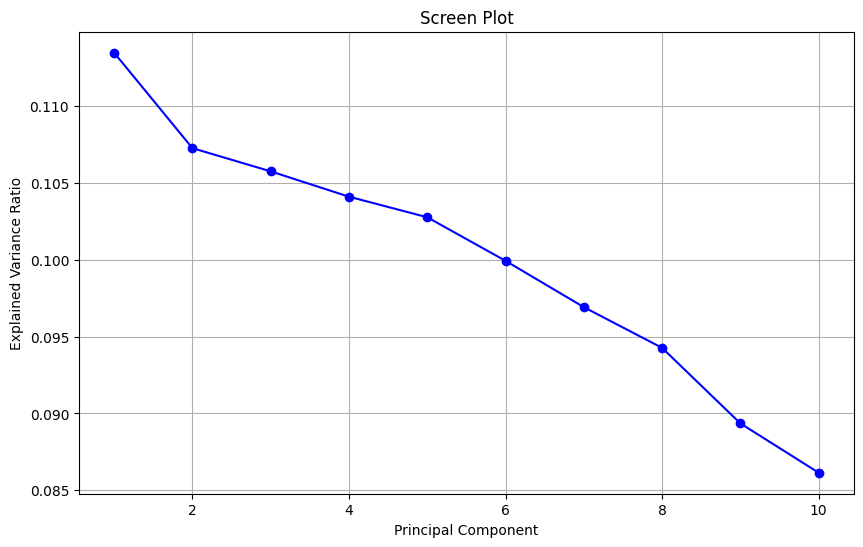

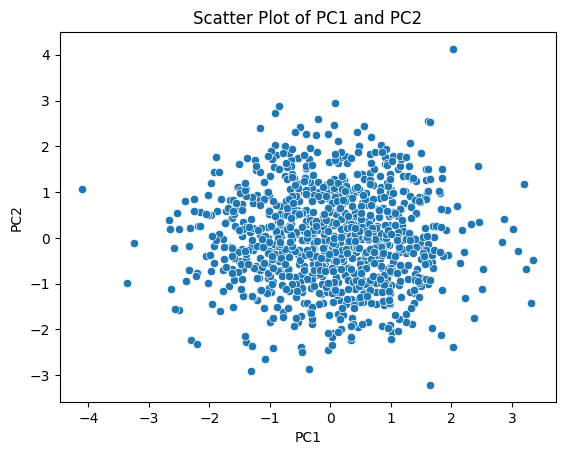

In [10]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA(n_components=10) #pca 모델
principal_components = pca.fit_transform(df.iloc[:,:-1]) #pca 적용

# Scree plot 그리기
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,11), pca.explained_variance_ratio_, 'o-', color= 'b')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Screen Plot")
plt.grid()
plt.show()

# PC1 와 PC2 산점도 그리기
df_pca = pd.DataFrame(principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
sns.scatterplot(data = df_pca, x = 'PC1', y = 'PC2')
plt.title("Scatter Plot of PC1 and PC2")
plt.show()


# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [11]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.4, random_state=42)


#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []

# 회귀모형 적합
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

for i in range(1,11):
  model = LinearRegression()
  model.fit(X_train_pca[:,:i], y_train)
  y_pred = model.predict(X_train_pca[:,:i])
  mse_train.append(mean_squared_error(y_train, y_pred))

mse_train

[16273.746562150745,
 15902.552716986356,
 13845.430103794693,
 13845.374423022931,
 11449.530525929213,
 10796.118269196002,
 9630.377404458242,
 9616.335177507084,
 3024.0421267763018,
 205.75839542600366]

# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

In [13]:
# test MSE 저장
mse_test = []

X_test_pca = pca.transform(X_test)

for i in range(1,11):
  model = LinearRegression()
  model.fit(X_train_pca[:,:i], y_train)

  y_pred = model.predict(X_test_pca[:,:i])
  mse_test.append(mean_squared_error(y_test, y_pred))

mse_test

[16180.434218108458,
 15868.705027491893,
 13094.092280637848,
 13092.025206343002,
 10839.122377382913,
 10346.1621732451,
 9525.310056375461,
 9533.080026421865,
 3102.066400427538,
 223.30593468057202]

# Bonus: MNIST 데이터로 PCA와 T-SNE 시각화 비교

데이터 로드

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


이미지로 보여주는 함수 정의 (가로로 10개의 이미지가 하나의 군집)

In [15]:
import matplotlib.pyplot as plt

# 가로로 10개의 이미지가 하나의 군집
def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

### PCA

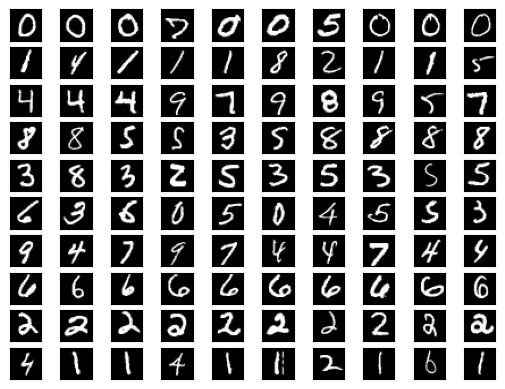

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30).fit(x_train)
reduced_X = pca.transform(x_train)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(init='k-means++', n_clusters=10)
model.fit(reduced_X)
y_pred = model.labels_

viz_img(y_pred)

시각화를 위해 주성분 개수를 2개로 설정한 후 시각화를 진행해보세요.

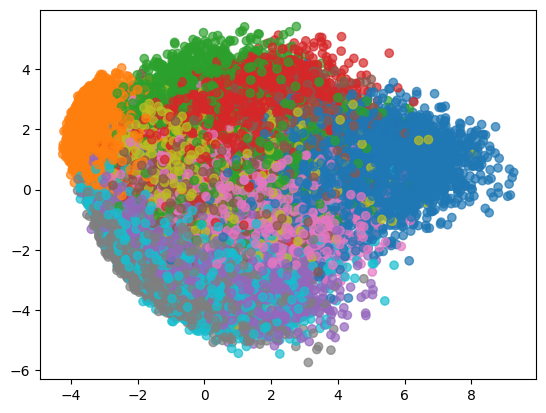

In [17]:
pca = PCA(n_components=2).fit(x_train)
reduced_X = pca.transform(x_train)
df = pd.DataFrame({'Column1': reduced_X[:,0], 'Column2': reduced_X[:,1]})
df['y_train'] = pd.Series(y_train, index=df.index)

plt.scatter(df['Column1'], df['Column2'], c=df['y_train'], cmap='tab10', alpha=0.7)
plt.show()

### T-SNE (그냥 실행해주세요!)

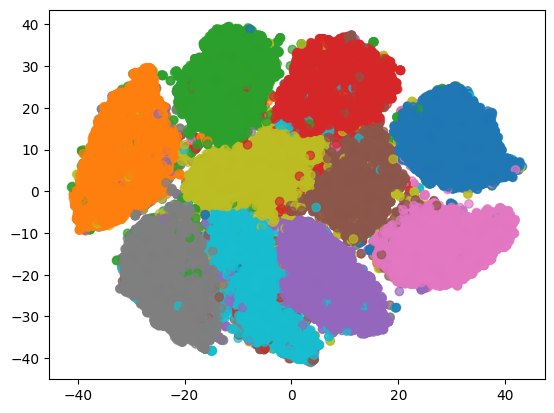

In [18]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, learning_rate=100)
transformed = model.fit_transform(x_train) # 좀 오래걸림(30분)
dataset = pd.DataFrame({'Column1': transformed[:,0], 'Column2': transformed[:,1]})
dataset['y_train'] = pd.Series(y_train, index=dataset.index)

plt.scatter(dataset['Column1'], dataset['Column2'], c=dataset['y_train'], cmap='tab10', alpha=0.7)
plt.show()